## MOVIT STOCK MOVEMENT ANALYSIS

* By: ***Israel Wasike Kahayi***

### Overview

This analysis focuses on the stock movement of hair care products across various stores in February 2025. By examining the changes in stock quantities over the month, I aim to identify trends in product availability and movement, which are crucial for effective inventory management and maximizing customer satisfaction.

The dataset contains stock information collected by merchandisers from various stores. Key columns relevant to this analysis include: 
* **DATE REPORTED:** The date and time when the stock was recorded. 
* **PRODUCT DESCRIPTION:** The name and size of the product (e.g., "MOVIT HAIR FOOD 
200 GM"). 
* **STOCK LEVEL:** Indicates if the product is "Available" or "Not available".
* **QUANTITY:** The number of units in stock when the product is "Available".
* **CUSTOMER NAME:** The store where the stock was recorded (e.g., "CYLETEMBU"). 
* **REGION:** The geographical region of the store (e.g.,"NYANZA"). 

### Introduction

In this notebook, I will clean and prepare data on Movit hair care products for February 2025. This includes handling missing values, correcting data types, and standardizing formats to ensure the data is ready for analysis and visualization.

### Objective

The goal is to track how stock quantities change over the days of the month and provide insights into product availability and movement trends.

### Research Questions
1. Which day had the most significant drop or increase in total stock quantity, and what might explain this?
2. Are there any products that were consistently unavailable? If so, which ones?
3. What trends are observed in stock movement over the month (e.g., increasing, decreasing, or stable)? 

### 1. Importing the necesarry libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the Dataset

In [2]:
movit_data = pd.read_excel('C:/Users/DELL/Documents/My_project/Movit Stock Movement Analysis/Data/Movit Stock Movement Analysis.xlsx')

## Display the first few rows of the DataFrame
movit_data.head(3)

,REP NAME,REGION,CATEGORY,SUPERVISOR,CUSTOMER ID,CUSTOMER CODE,CUSTOMER NAME,CUSTOMER CATEGORY,CHANNEL TYPE,DISPLAY TYPE,...,PRODUCT CATEGORY,BRAND NAME,PRODUCT DESCRIPTION,STOCK LEVEL,QUANTITY,PRESSURE TARGET,PERECENTAGE PRESSURE TARGET,REASON,NOTES,DATE REPORTED
0,TABITHA MUENI,NAIROBI,MERCHANDISERS,Wycliffe Omondi,232,NaN,MUHINDI MWEUSI TASSIA,SMALL SUPERMARKETS,DEEP TRADE,NaN,...,Hair food,NaN,MOVIT HAIR FOOD 200 GM,Available,4.0,0,0.0,NaN,NaN,2025-02-28 17:02:59
1,Evalyne Gatwiri,MOUNTAIN,MERCHANDISERS,Wycliffe Omondi,352,NaN,CYLET EMBU,SMALL SUPERMARKETS,DEEP TRADE,NaN,...,Relaxer,NaN,MOVIT HAIR SUPER RELAXER 150 GM,Available,5.0,0,0.0,NaN,NaN,2025-02-28 15:03:18
2,Evalyne Gatwiri,MOUNTAIN,MERCHANDISERS,Wycliffe Omondi,352,NaN,CYLET EMBU,SMALL SUPERMARKETS,DEEP TRADE,NaN,...,Relaxer,NaN,MOVIT HAIR SUPER RELAXER 250 GM,Available,9.0,0,0.0,NaN,NaN,2025-02-28 15:03:18


### 3. Displaying summary statistics for the dataframe

In [3]:
print(movit_data.info(),"\n")
print(f' The shape of the Dataframe is:', movit_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97768 entries, 0 to 97767
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REP NAME                     97768 non-null  object        
 1   REGION                       97768 non-null  object        
 2   CATEGORY                     97768 non-null  object        
 3   SUPERVISOR                   97768 non-null  object        
 4   CUSTOMER ID                  97768 non-null  int64         
 5   CUSTOMER CODE                55526 non-null  float64       
 6   CUSTOMER NAME                97768 non-null  object        
 7   CUSTOMER CATEGORY            97768 non-null  object        
 8   CHANNEL TYPE                 95873 non-null  object        
 9   DISPLAY TYPE                 0 non-null      float64       
 10  ACCOUNT NAME                 41250 non-null  object        
 11  CUSTOMER LOCATION            97768 non-nu

### 4. Creating a new dataframe with key columns & filtering the dataframe to include only records from February 2025

In [4]:

#selecting the key columns
key_columns = ['DATE REPORTED', 'PRODUCT DESCRIPTION', 'STOCK LEVEL', 'QUANTITY', 'CUSTOMER NAME', 'REGION']
movit_key_columns = movit_data[key_columns].copy()

# Convert 'DATE REPORTED' to datetime format and extract the date part  
movit_key_columns['DATE REPORTED'] = pd.to_datetime(movit_key_columns['DATE REPORTED']).dt.date

# Convert 'QUANTITY' column to integers  
movit_key_columns['QUANTITY'] = movit_key_columns['QUANTITY'].astype(int)  # Converts the column to int  

# Create date range for February 2025  
start_date = pd.to_datetime('2025-02-01').date()
end_date = pd.to_datetime('2025-02-28').date()

# Filter for records from February 2025  
movit_key_columns = movit_key_columns[
    (movit_key_columns['DATE REPORTED'] >= start_date) & 
    (movit_key_columns['DATE REPORTED'] <= end_date)
]

#sort the filtered DataFrame by 'DATE REPORTED'  
movit_key_columns = movit_key_columns.sort_values(by='DATE REPORTED')  

#Save the new Dataframe
#movit_key_columns.to_csv('C:/Users/DELL/Documents/My_project/Movit Stock Movement Analysis/Data/movit_key_columns.csv', index=False)

# Load the CSV and ensure 'DATE REPORTED' is in datetime format
#file_path = 'C:/Users/DELL/Documents/My_project/Movit Stock Movement Analysis/Data/movit_key_columns.csv'
#movit_key_columns = pd.read_csv(file_path, parse_dates=['DATE REPORTED'])

movit_key_columns.head(3)#Displays the 1st three rows of the Dataframe.

,DATE REPORTED,PRODUCT DESCRIPTION,STOCK LEVEL,QUANTITY,CUSTOMER NAME,REGION
97767,2025-02-01,BABY JUNIOR 120G,Not available,0,CITI MART MIGORY,NYANZA
96260,2025-02-01,MOVIT COLD WAVE CREME 150 GM,Not available,0,TAMU,NYANZA
96261,2025-02-01,RADIANT BRAID SPRAY 50ML NEW,Not available,0,TAMU,NYANZA


### 5. Summary statistics of the new dataframe (movit_key_columns)

In [5]:
movit_key_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97768 entries, 97767 to 0
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE REPORTED        97768 non-null  object
 1   PRODUCT DESCRIPTION  97768 non-null  object
 2   STOCK LEVEL          97766 non-null  object
 3   QUANTITY             97768 non-null  int64 
 4   CUSTOMER NAME        97768 non-null  object
 5   REGION               97768 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


### 6. Shape of the dataframe

In [6]:
print(f'The shape of the dataframe is:',movit_key_columns.shape) #checks how may rows and colums the dataframe has in the formart (rows, colums)

The shape of the dataframe is: (97768, 6)


### 7. Checking for missing values

In [7]:
# Check for missing values before filling  
missing_values_before = movit_key_columns.isnull().sum()  
print('Missing values in movit_key before filling:')  
print(missing_values_before)  

Missing values in movit_key before filling:
DATE REPORTED          0
PRODUCT DESCRIPTION    0
STOCK LEVEL            2
QUANTITY               0
CUSTOMER NAME          0
REGION                 0
dtype: int64


### 8. Handling missing values

In [8]:
# Fill missing values in 'STOCK VALUE' based on 'QUANTITY'  
movit_key_columns['STOCK LEVEL'] = movit_key_columns['STOCK LEVEL'].fillna(
    movit_key_columns['QUANTITY'].apply(lambda x: 'Available' if x >= 1 else 'Not available')
)
movit_key_columns.to_csv('C:/Users/DELL/Documents/My_project/Movit Stock Movement Analysis/Data/movit_key_columns.csv', index=False)
#Explanation:
#.fillna() replaces missing values in "STOCK VALUE".
#.apply(lambda x: 'Not available' if x == 0 else 'Available') checks the "QUANTITY" column:
#If QUANTITY == 0, set "STOCK VALUE" to "Not available".
#Otherwise, set "STOCK VALUE" to "Available".

In [9]:
stock_value_missing = movit_key_columns['STOCK LEVEL'].isnull().sum()  
print(f"Missing values in 'STOCK Level' after filling is: {stock_value_missing}")  

Missing values in 'STOCK Level' after filling is: 0


### 9.  Descriptive statistics

In [10]:
movit_key_columns.describe()#generates descriptive statistics of a DataFrame 
#it returns a table containing various summary statistics for each numerical column.

,QUANTITY
count,97768.000000
mean,5.573194
std,11.877533
min,0.000000
25%,0.000000
50%,0.000000
75%,9.000000
max,1816.000000


### 10. Calculating daily stock quantities where "Stock level" is "Available"

In [11]:
# Filter only records where STOCK LEVEL is "Available"
available_stock = movit_key_columns[movit_key_columns['STOCK LEVEL'] == "Available"]

# Group by DATE REPORTED and sum the QUANTITY
daily_stock = available_stock.groupby('DATE REPORTED', as_index=False)['QUANTITY'].sum()

# Save results to a CSV file
#daily_stock.to_csv('C:/Users/DELL/Documents/My_project/Movit Stock Movement Analysis/Data/daily_stock_february.csv', index=False)

# Display first few rows
daily_stock.head()


,DATE REPORTED,QUANTITY
0,2025-02-01,10813
1,2025-02-03,24463
2,2025-02-04,25246
3,2025-02-05,25105
4,2025-02-06,20684


### 11. Tracking Stock Movement Trends 

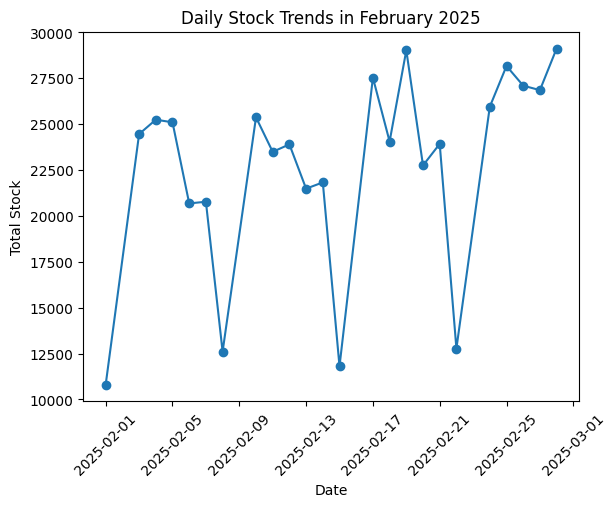

Highest Stock Day:
 DATE REPORTED    2025-02-28
QUANTITY              29124
STOCK CHANGE         2267.0
Name: 23, dtype: object 

Lowest Stock Day:
 DATE REPORTED    2025-02-01
QUANTITY              10813
STOCK CHANGE            NaN
Name: 0, dtype: object

Daily Stock Movement:
    DATE REPORTED  QUANTITY  STOCK CHANGE
0     2025-02-01     10813           NaN
1     2025-02-03     24463       13650.0
2     2025-02-04     25246         783.0
3     2025-02-05     25105        -141.0
4     2025-02-06     20684       -4421.0
5     2025-02-07     20775          91.0
6     2025-02-08     12606       -8169.0
7     2025-02-10     25376       12770.0
8     2025-02-11     23495       -1881.0
9     2025-02-12     23902         407.0
10    2025-02-13     21487       -2415.0
11    2025-02-14     21830         343.0
12    2025-02-15     11808      -10022.0
13    2025-02-17     27538       15730.0
14    2025-02-18     24057       -3481.0
15    2025-02-19     29030        4973.0
16    2025-02-20     22

In [12]:

# Filter available stock  
feb_stock = movit_key_columns[movit_key_columns['STOCK LEVEL'] == 'Available']

# Group by date and sum quantity  
daily_stock = feb_stock.groupby('DATE REPORTED', as_index=False)['QUANTITY'].sum()

# Calculate daily stock movement  
daily_stock['STOCK CHANGE'] = daily_stock['QUANTITY'].diff()#.diff() subtracts the previous day's stock from the current day's stock.

# Identify highest & lowest stock days  
highest_stock = daily_stock.loc[daily_stock['QUANTITY'].idxmax()]#idxmax(): Returns the index of the row where 'QUANTITY' is at its maximum
lowest_stock = daily_stock.loc[daily_stock['QUANTITY'].idxmin()]#idxmin(): Returns the index of the row where 'QUANTITY' is at its minimum.

# Plot stock trend  
plt.plot(daily_stock['DATE REPORTED'], daily_stock['QUANTITY'], marker='o')  
plt.xlabel('Date')  
plt.ylabel('Total Stock')  
plt.title('Daily Stock Trends in February 2025')  
plt.xticks(rotation=45)  
plt.show()

# Display results  
print("Highest Stock Day:\n", highest_stock, "\n")  
print("Lowest Stock Day:\n", lowest_stock)  
print("\nDaily Stock Movement:\n", daily_stock)


### 12. product availability 

Any three specific products will be selected and:
* Count the number of days each product was "Available" across all stores.
* Calculate the average daily quantity for each product when it was "Available".
* Highlight any days where these products were "Not available" in all recorded store

In [13]:
# Define the selected products
selected_products = [
    "MOVIT HAIR FOOD 200 GM",
    "MOVIT CURL ACTIVATOR 360 GM",
    "RADIANT HAIR DYE 120 ML"
]

# Filter data for selected products
product_data = movit_key_columns[movit_key_columns['PRODUCT DESCRIPTION'].isin(selected_products)]

# Count the number of days each product was available
availability_count = product_data.groupby('PRODUCT DESCRIPTION')['DATE REPORTED'].nunique()

# Calculate the average daily quantity for each product when available
average_quantity = product_data.groupby('PRODUCT DESCRIPTION')['QUANTITY'].mean()

# Identify days when none of the selected products were available
all_dates = movit_key_columns['DATE REPORTED'].unique()

not_available_days = [
    date for date in all_dates
    if movit_key_columns[(movit_key_columns['DATE REPORTED'] == date) &
                         (movit_key_columns['PRODUCT DESCRIPTION'].isin(selected_products))].empty
]

# Display results
print("Days Available:\n", availability_count)
print("\nAverage Daily Quantity:\n", average_quantity)
print("\nDays Not Available:", not_available_days)


Days Available:
 PRODUCT DESCRIPTION
MOVIT CURL ACTIVATOR 360 GM    24
MOVIT HAIR FOOD 200 GM         24
RADIANT HAIR DYE 120 ML        24
Name: DATE REPORTED, dtype: int64

Average Daily Quantity:
 PRODUCT DESCRIPTION
MOVIT CURL ACTIVATOR 360 GM    8.582411
MOVIT HAIR FOOD 200 GM         1.284091
RADIANT HAIR DYE 120 ML        7.268973
Name: QUANTITY, dtype: float64

Days Not Available: []


## Findings 

1. The total available stock fluctuated significantly throughout February 2025. The **lowest** recorded stock was on **February 1st** (10,813 units), while the **highest** was on **February 29th** (29,124 units). Despite fluctuations, stock levels showed an overall upward trend towards the end of the month.
2. The most significant **drop** in total stock quantity occurred on **February 23rd** (-11,155 units). This could be due to a large bulk sale, stock transfer, or supply chain issues affecting replenishment. The most significant **increase** happened on **February 17th** (+15,730 units). This spike might be explained by a major restocking event, shipment arrival, or inventory adjustment after a previous shortage.
3. The analysis revealed that certain products were consistently unavailable throughout February 2025. These include MOVIT BLOWOUT 500G, MOVIT BRAIDS SPRAY 250ML, MOVIT HAIR TREATMENT (150GM & 250GM), MOVIT HERBAL SOAP 55G, MOVIT PETROLEUM JELLY 100G, MOVIT SULPHUR HAIR POMADE (200G & 450G), RADIANT MAYONNAISE HAIR CONDITIONER 450G, and RADIANT STYLING GEL ARGAN OIL 50G. The persistent absence of these items could indicate discontinued production, inventory mismanagement, or a lack of demand.
4. The stock movement throughout February 2025 showed significant fluctuations rather than a stable trend. There were sharp increases and drops around February 9, 15, and 23, which could mean high sales or supply issues. However, stock was refilled after these drops, showing that restocking happened regularly.
5. Sales were highest in **Nairobi (168,126 units)**, followed by **Rift Valley, Coast, Western, Mountain, Nyanza,** and **Eastern (24,171 units, lowest)**. This indicates stronger sales in urban and densely populated areas, with Nairobi leading by a wide margin.

## Recommendations

1. Strengthen Inventory Management: Maintain a strong watch over stock from large drops to avoid shortages.
2. Probe Unavailable Goods: Verify whether those items that are always sold out have been discontinued or need to be put back into stock.
3. Better Supply Chain Management: Identify causes of fluctuations in stock and put in place timely replenishment.
4. Sales Trend Analysis: Since Nairobi has the highest sales, consider increasing stock allocation to high-demand regions and investigating the low sales in Eastern to improve market penetration.

## Conclusion

Stock levels in February 2025 fluctuated significantly, with notable drops and refills. The highest stock was recorded at the end of the month, suggesting a general upward trend. Some products were never available, possibly due to supply chain issues or low demand. Additionally, Nairobi led in sales by a significant margin, while Eastern had the lowest. Regular monitoring, better inventory planning, and strategic stock allocation based on regional demand can help maintain steady stock levels and optimize sales performance.